In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cross_validation import train_test_split

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Read the data
Data = pd.DataFrame(pd.read_csv("../input/seattleWeather_1948-2017.csv"))

# Data Pre-processing

In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
DATE    25551 non-null object
PRCP    25548 non-null float64
TMAX    25551 non-null int64
TMIN    25551 non-null int64
RAIN    25548 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [4]:
#As we can see there ara 3 missing values in PRCP and in RAIN

In [5]:
# Checking where the missing value lies
Data[pd.isnull(Data['RAIN'])]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [6]:
Data[pd.isnull(Data['PRCP'])]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


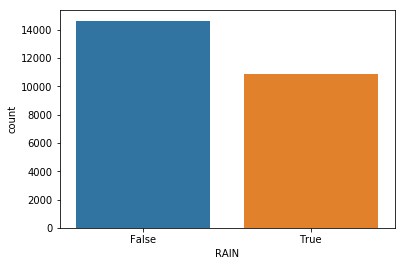

In [7]:
sns.countplot(data = Data,x= 'RAIN')

In [8]:
# As we can see that the False value is more so I will simply replace the missing values 
# with False and for PRCP with the mean of the feature

def RAIN_Insertion(cols):
    RAIN = cols[0]
    if pd.isnull(RAIN):
        return 'False'
    else:
        return RAIN
def PRCP_Insertion(col):
    PRCP = col[0]
    if pd.isnull(PRCP):
        return Data['PRCP'].mean()
    else:
        return PRCP

In [9]:
Data['RAIN'] = Data[['RAIN']].apply(RAIN_Insertion,axis=1)
Data['PRCP'] = Data[['PRCP']].apply(PRCP_Insertion,axis=1)

In [10]:
# As we can see the missing values have been replaced
Data[pd.isnull(Data['RAIN'])]

,DATE,PRCP,TMAX,TMIN,RAIN


In [11]:
Data[pd.isnull(Data['PRCP'])]

,DATE,PRCP,TMAX,TMIN,RAIN


In [12]:
# The length of rows for all column is same now
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
DATE    25551 non-null object
PRCP    25551 non-null float64
TMAX    25551 non-null int64
TMIN    25551 non-null int64
RAIN    25551 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


# Exploratory Data Analysis

Text(0.5,1,'Precipitation vs Minimum Temperature')

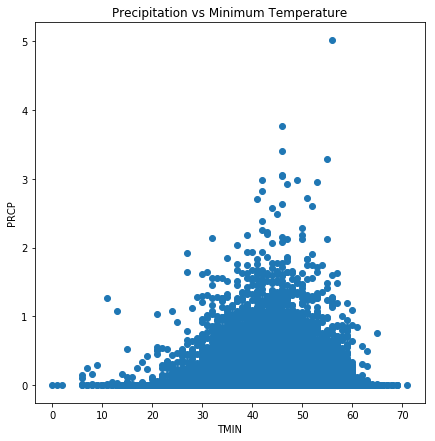

In [13]:
plt.figure(figsize = (7,7))
plt.scatter(x = 'TMIN', y = 'PRCP',data = Data)
plt.xlabel('TMIN')
plt.ylabel('PRCP')
plt.title('Precipitation vs Minimum Temperature')

Text(0.5,1,'Precipitation vs Maximum Temperature')

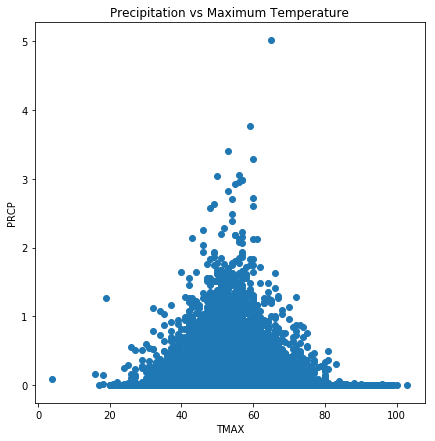

In [14]:
plt.figure(figsize = (7,7))
plt.scatter(x = 'TMAX', y='PRCP', data = Data)
plt.xlabel('TMAX')
plt.ylabel('PRCP')
plt.title('Precipitation vs Maximum Temperature')

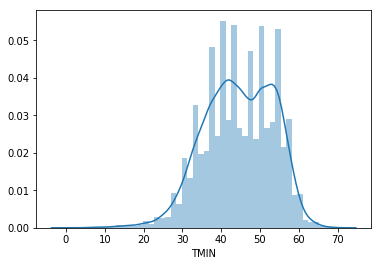

In [15]:
sns.distplot(Data['TMIN'])

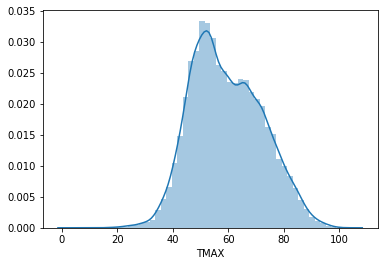

In [16]:
sns.distplot(Data['TMAX'])

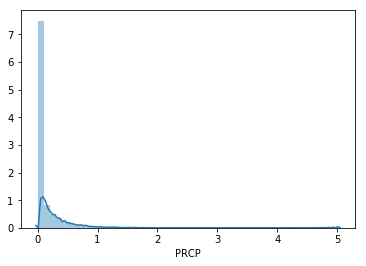

In [17]:
sns.distplot(Data['PRCP'])

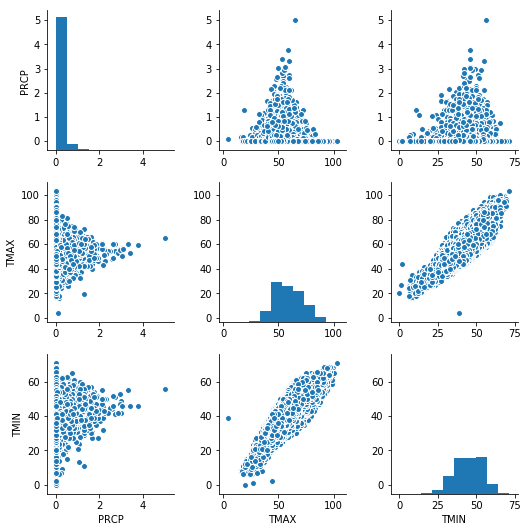

In [18]:
sns.pairplot(data = Data)

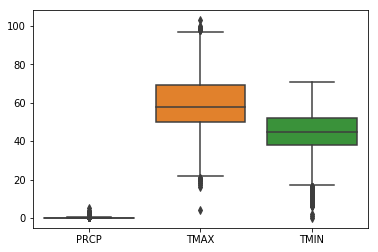

In [19]:
sns.boxplot(data = Data)

In [20]:
z = 2.0
Mean_Tmax = Data["TMAX"].mean()
Std_Tmax = Data["TMAX"].std()
Mean_Tmin = Data["TMIN"].mean()
Std_Tmin = Data["TMIN"].std()
Mean_Prcp = Data["PRCP"].mean()
Std_Prcp = Data["PRCP"].std()
LowTmax = Mean_Tmax - z * Std_Tmax
HighTmax= Mean_Tmax + z * Std_Tmax
LowTmin = Mean_Tmin - z * Std_Tmin
HighTmin = Mean_Tmin + z * Std_Tmin
LowPrcp = Mean_Prcp - z * Std_Prcp
HighPrcp = Mean_Prcp + z * Std_Prcp

In [21]:
# As we can see there are outliers in the data
Data = Data.drop(Data[(Data['TMIN']>HighTmin)| (Data['TMIN']<LowTmin)].index)
Data = Data.drop(Data[(Data['TMAX']>HighTmax) | (Data['TMAX']<LowTmax)].index)
Data = Data.drop(Data[(Data['PRCP']>HighPrcp) | (Data['PRCP']<LowPrcp)].index)

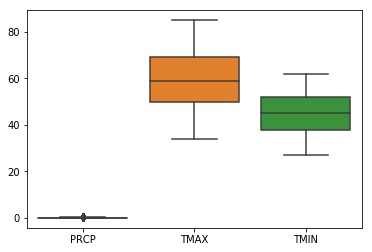

In [22]:
sns.boxplot(data=Data)

In [23]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23170 entries, 0 to 25550
Data columns (total 5 columns):
DATE    23170 non-null object
PRCP    23170 non-null float64
TMAX    23170 non-null int64
TMIN    23170 non-null int64
RAIN    23170 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 1.1+ MB


# Training the model

In [24]:
Labels = Data['RAIN']
Labels = Labels.astype('bool')
Data = Data.drop(['DATE','RAIN'],axis = 1)

In [25]:
Max = []
for i in range(0,len(Data.columns)):
    Max.append(max(Data.iloc[:,i]))
Data = Data/Max

In [26]:
# Splitting the data into training and testing
TrainData, TestData,TrainLabels,TestLabels = train_test_split(Data,Labels,test_size = 0.2)

In [27]:
def sigmoid(m,c,x):
    return (1/(1+np.exp(-(np.dot(x,m)+c))))

In [40]:
def cost1(m,c,x,y):
    #Taking error when label = 1
    cost1 = -((y.values.reshape(len(y),1))*np.log(sigmoid(m,c,x)))
    return cost1
def cost2(m,c,x,y):
    #Taking the error when label = 0
    cost2 = ((1-y.values.reshape(len(y),1)))*np.log(sigmoid(m,c,x))
    return cost2

def cost(cost1,cost2):
    #Taking the sum of both costs
    cost = cost1-cost2
    
    return np.mean(cost)
    

In [35]:
def GradientDescent1(m,x,c,y):
    return np.dot(x.T,(sigmoid(m,c,x)-y.values.reshape(18536,1)))
def GradientDescent2(m,x,c,y):
    return sigmoid(m,c,x) - y.values.reshape(18536,1)

In [36]:
Theta1 = np.random.randn(3,1)
Theta2 = np.random.randn(1)
alpha = 0.0005
CE = []
iterations = []
for i in range(0,5000):
    Theta1New = Theta1 - alpha*(np.mean(GradientDescent1(Theta1,TrainData,Theta2,TrainLabels)))
    Theta2New = Theta2 - alpha*(np.mean(GradientDescent2(Theta1,TrainData,Theta2,TrainLabels)))
    
    Theta1 = Theta1New
    Theta2 = Theta2New
    CostFunctionError = cost(cost1(Theta1,Theta2,TrainData,TrainLabels),cost2(Theta1,Theta2,TrainData,TrainLabels))
    CE.append(CostFunctionError)
    iterations.append(i)
    
    print("Weights are",Theta1,Theta2)

Weights are [[ 0.63054319]
 [ 0.06268527]
 [-0.53276439]] [-0.38920248]
Weights are [[ 1.04987077]
 [ 0.48201284]
 [-0.11343681]] [-0.38916806]
Weights are [[ 0.70590095]
 [ 0.13804303]
 [-0.45740663]] [-0.38921098]
Weights are [[ 0.99457065]
 [ 0.42671273]
 [-0.16873693]] [-0.38918979]
Weights are [[ 0.75408058]
 [ 0.18622266]
 [-0.409227  ]] [-0.3892222]
Weights are [[ 0.95708215]
 [ 0.38922423]
 [-0.20622543]] [-0.38920967]
Weights are [[ 0.7867212 ]
 [ 0.21886328]
 [-0.37658638]] [-0.38923497]
Weights are [[ 0.93088271]
 [ 0.36302479]
 [-0.23242487]] [-0.3892284]
Weights are [[ 0.80944348]
 [ 0.24158555]
 [-0.3538641 ]] [-0.38924873]
Weights are [[ 0.91231213]
 [ 0.34445421]
 [-0.25099545]] [-0.38924634]
Weights are [[ 0.82547937]
 [ 0.25762145]
 [-0.33782821]] [-0.38926316]
Weights are [[ 0.89906147]
 [ 0.33120355]
 [-0.26424611]] [-0.38926373]
Weights are [[ 0.83687847]
 [ 0.26902055]
 [-0.32642911]] [-0.38927806]
Weights are [[ 0.88957806]
 [ 0.32172014]
 [-0.27372952]] [-0.3892

 [-0.29728829]] [-0.39011753]
Weights are [[ 0.8660243 ]
 [ 0.29816638]
 [-0.29728328]] [-0.39012555]
Weights are [[ 0.86602932]
 [ 0.2981714 ]
 [-0.29727826]] [-0.39013357]
Weights are [[ 0.86603434]
 [ 0.29817642]
 [-0.29727324]] [-0.39014159]
Weights are [[ 0.86603936]
 [ 0.29818144]
 [-0.29726822]] [-0.39014961]
Weights are [[ 0.86604438]
 [ 0.29818646]
 [-0.2972632 ]] [-0.39015763]
Weights are [[ 0.8660494 ]
 [ 0.29819148]
 [-0.29725818]] [-0.39016565]
Weights are [[ 0.86605442]
 [ 0.2981965 ]
 [-0.29725316]] [-0.39017367]
Weights are [[ 0.86605944]
 [ 0.29820151]
 [-0.29724814]] [-0.39018169]
Weights are [[ 0.86606445]
 [ 0.29820653]
 [-0.29724312]] [-0.39018971]
Weights are [[ 0.86606947]
 [ 0.29821155]
 [-0.29723811]] [-0.39019773]
Weights are [[ 0.86607449]
 [ 0.29821657]
 [-0.29723309]] [-0.39020575]
Weights are [[ 0.86607951]
 [ 0.29822159]
 [-0.29722807]] [-0.39021377]
Weights are [[ 0.86608453]
 [ 0.29822661]
 [-0.29722305]] [-0.39022179]
Weights are [[ 0.86608955]
 [ 0.29

Weights are [[ 0.86662142]
 [ 0.29876349]
 [-0.29668616]] [-0.39107976]
Weights are [[ 0.86662643]
 [ 0.29876851]
 [-0.29668115]] [-0.39108778]
Weights are [[ 0.86663145]
 [ 0.29877353]
 [-0.29667613]] [-0.3910958]
Weights are [[ 0.86663647]
 [ 0.29877854]
 [-0.29667111]] [-0.39110381]
Weights are [[ 0.86664148]
 [ 0.29878356]
 [-0.2966661 ]] [-0.39111183]
Weights are [[ 0.8666465 ]
 [ 0.29878858]
 [-0.29666108]] [-0.39111985]
Weights are [[ 0.86665151]
 [ 0.29879359]
 [-0.29665606]] [-0.39112786]
Weights are [[ 0.86665653]
 [ 0.29879861]
 [-0.29665105]] [-0.39113588]
Weights are [[ 0.86666155]
 [ 0.29880363]
 [-0.29664603]] [-0.39114389]
Weights are [[ 0.86666656]
 [ 0.29880864]
 [-0.29664102]] [-0.39115191]
Weights are [[ 0.86667158]
 [ 0.29881366]
 [-0.296636  ]] [-0.39115993]
Weights are [[ 0.8666766 ]
 [ 0.29881867]
 [-0.29663098]] [-0.39116794]
Weights are [[ 0.86668161]
 [ 0.29882369]
 [-0.29662597]] [-0.39117596]
Weights are [[ 0.86668663]
 [ 0.29882871]
 [-0.29662095]] [-0.391

 [-0.29608936]] [-0.39203349]
Weights are [[ 0.86722323]
 [ 0.29936531]
 [-0.29608435]] [-0.3920415]
Weights are [[ 0.86722825]
 [ 0.29937033]
 [-0.29607933]] [-0.39204951]
Weights are [[ 0.86723326]
 [ 0.29937534]
 [-0.29607432]] [-0.39205752]
Weights are [[ 0.86723828]
 [ 0.29938035]
 [-0.2960693 ]] [-0.39206554]
Weights are [[ 0.86724329]
 [ 0.29938537]
 [-0.29606429]] [-0.39207355]
Weights are [[ 0.8672483 ]
 [ 0.29939038]
 [-0.29605928]] [-0.39208156]
Weights are [[ 0.86725332]
 [ 0.2993954 ]
 [-0.29605426]] [-0.39208957]
Weights are [[ 0.86725833]
 [ 0.29940041]
 [-0.29604925]] [-0.39209759]
Weights are [[ 0.86726334]
 [ 0.29940542]
 [-0.29604424]] [-0.3921056]
Weights are [[ 0.86726836]
 [ 0.29941044]
 [-0.29603922]] [-0.39211361]
Weights are [[ 0.86727337]
 [ 0.29941545]
 [-0.29603421]] [-0.39212162]
Weights are [[ 0.86727839]
 [ 0.29942046]
 [-0.29602919]] [-0.39212963]
Weights are [[ 0.8672834 ]
 [ 0.29942548]
 [-0.29602418]] [-0.39213765]
Weights are [[ 0.86728841]
 [ 0.2994

Weights are [[ 0.86796505]
 [ 0.30010712]
 [-0.29534253]] [-0.39322695]
Weights are [[ 0.86797006]
 [ 0.30011213]
 [-0.29533752]] [-0.39323496]
Weights are [[ 0.86797507]
 [ 0.30011714]
 [-0.29533251]] [-0.39324297]
Weights are [[ 0.86798008]
 [ 0.30012215]
 [-0.2953275 ]] [-0.39325097]
Weights are [[ 0.86798509]
 [ 0.30012717]
 [-0.29532249]] [-0.39325898]
Weights are [[ 0.8679901 ]
 [ 0.30013218]
 [-0.29531748]] [-0.39326699]
Weights are [[ 0.86799511]
 [ 0.30013719]
 [-0.29531247]] [-0.393275]
Weights are [[ 0.86800012]
 [ 0.3001422 ]
 [-0.29530746]] [-0.393283]
Weights are [[ 0.86800513]
 [ 0.30014721]
 [-0.29530245]] [-0.39329101]
Weights are [[ 0.86801014]
 [ 0.30015222]
 [-0.29529744]] [-0.39329902]
Weights are [[ 0.86801515]
 [ 0.30015723]
 [-0.29529243]] [-0.39330702]
Weights are [[ 0.86802016]
 [ 0.30016224]
 [-0.29528742]] [-0.39331503]
Weights are [[ 0.86802517]
 [ 0.30016725]
 [-0.29528241]] [-0.39332304]
Weights are [[ 0.86803018]
 [ 0.30017226]
 [-0.2952774 ]] [-0.393331

Weights are [[ 0.86869136]
 [ 0.30083343]
 [-0.29461622]] [-0.39438764]
Weights are [[ 0.86869636]
 [ 0.30083844]
 [-0.29461122]] [-0.39439564]
Weights are [[ 0.86870137]
 [ 0.30084345]
 [-0.29460621]] [-0.39440365]
Weights are [[ 0.86870638]
 [ 0.30084846]
 [-0.2946012 ]] [-0.39441165]
Weights are [[ 0.86871139]
 [ 0.30085346]
 [-0.29459619]] [-0.39441965]
Weights are [[ 0.86871639]
 [ 0.30085847]
 [-0.29459119]] [-0.39442765]
Weights are [[ 0.8687214 ]
 [ 0.30086348]
 [-0.29458618]] [-0.39443565]
Weights are [[ 0.86872641]
 [ 0.30086849]
 [-0.29458117]] [-0.39444366]
Weights are [[ 0.86873142]
 [ 0.30087349]
 [-0.29457616]] [-0.39445166]
Weights are [[ 0.86873642]
 [ 0.3008785 ]
 [-0.29457116]] [-0.39445966]
Weights are [[ 0.86874143]
 [ 0.30088351]
 [-0.29456615]] [-0.39446766]
Weights are [[ 0.86874644]
 [ 0.30088852]
 [-0.29456114]] [-0.39447566]
Weights are [[ 0.86875144]
 [ 0.30089352]
 [-0.29455614]] [-0.39448367]
Weights are [[ 0.86875645]
 [ 0.30089853]
 [-0.29455113]] [-0.39

Weights are [[ 0.86941221]
 [ 0.30155428]
 [-0.29389537]] [-0.3955396]
Weights are [[ 0.86941721]
 [ 0.30155929]
 [-0.29389037]] [-0.3955476]
Weights are [[ 0.86942221]
 [ 0.30156429]
 [-0.29388537]] [-0.3955556]
Weights are [[ 0.86942722]
 [ 0.3015693 ]
 [-0.29388036]] [-0.3955636]
Weights are [[ 0.86943222]
 [ 0.3015743 ]
 [-0.29387536]] [-0.39557159]
Weights are [[ 0.86943723]
 [ 0.30157931]
 [-0.29387035]] [-0.39557959]
Weights are [[ 0.86944223]
 [ 0.30158431]
 [-0.29386535]] [-0.39558759]
Weights are [[ 0.86944724]
 [ 0.30158931]
 [-0.29386034]] [-0.39559558]
Weights are [[ 0.86945224]
 [ 0.30159432]
 [-0.29385534]] [-0.39560358]
Weights are [[ 0.86945724]
 [ 0.30159932]
 [-0.29385034]] [-0.39561158]
Weights are [[ 0.86946225]
 [ 0.30160433]
 [-0.29384533]] [-0.39561958]
Weights are [[ 0.86946725]
 [ 0.30160933]
 [-0.29384033]] [-0.39562757]
Weights are [[ 0.86947226]
 [ 0.30161433]
 [-0.29383532]] [-0.39563557]
Weights are [[ 0.86947726]
 [ 0.30161934]
 [-0.29383032]] [-0.395643

Weights are [[ 0.8701326 ]
 [ 0.30227468]
 [-0.29317498]] [-0.39669085]
Weights are [[ 0.87013761]
 [ 0.30227968]
 [-0.29316997]] [-0.39669884]
Weights are [[ 0.87014261]
 [ 0.30228468]
 [-0.29316497]] [-0.39670684]
Weights are [[ 0.87014761]
 [ 0.30228969]
 [-0.29315997]] [-0.39671483]
Weights are [[ 0.87015261]
 [ 0.30229469]
 [-0.29315497]] [-0.39672282]
Weights are [[ 0.87015761]
 [ 0.30229969]
 [-0.29314997]] [-0.39673081]
Weights are [[ 0.87016261]
 [ 0.30230469]
 [-0.29314497]] [-0.3967388]
Weights are [[ 0.87016761]
 [ 0.30230969]
 [-0.29313997]] [-0.3967468]
Weights are [[ 0.87017261]
 [ 0.30231469]
 [-0.29313497]] [-0.39675479]
Weights are [[ 0.87017761]
 [ 0.30231969]
 [-0.29312997]] [-0.39676278]
Weights are [[ 0.87018262]
 [ 0.30232469]
 [-0.29312496]] [-0.39677077]
Weights are [[ 0.87018762]
 [ 0.30232969]
 [-0.29311996]] [-0.39677876]
Weights are [[ 0.87019262]
 [ 0.3023347 ]
 [-0.29311496]] [-0.39678676]
Weights are [[ 0.87019762]
 [ 0.3023397 ]
 [-0.29310996]] [-0.3967

Weights are [[ 0.87086755]
 [ 0.30300962]
 [-0.29244003]] [-0.39786534]
Weights are [[ 0.87087254]
 [ 0.30301462]
 [-0.29243503]] [-0.39787333]
Weights are [[ 0.87087754]
 [ 0.30301962]
 [-0.29243004]] [-0.39788132]
Weights are [[ 0.87088254]
 [ 0.30302462]
 [-0.29242504]] [-0.3978893]
Weights are [[ 0.87088754]
 [ 0.30302962]
 [-0.29242004]] [-0.39789729]
Weights are [[ 0.87089254]
 [ 0.30303461]
 [-0.29241504]] [-0.39790528]
Weights are [[ 0.87089753]
 [ 0.30303961]
 [-0.29241005]] [-0.39791326]
Weights are [[ 0.87090253]
 [ 0.30304461]
 [-0.29240505]] [-0.39792125]
Weights are [[ 0.87090753]
 [ 0.30304961]
 [-0.29240005]] [-0.39792924]
Weights are [[ 0.87091253]
 [ 0.30305461]
 [-0.29239505]] [-0.39793723]
Weights are [[ 0.87091753]
 [ 0.3030596 ]
 [-0.29239005]] [-0.39794521]
Weights are [[ 0.87092252]
 [ 0.3030646 ]
 [-0.29238506]] [-0.3979532]
Weights are [[ 0.87092752]
 [ 0.3030696 ]
 [-0.29238006]] [-0.39796119]
Weights are [[ 0.87093252]
 [ 0.3030746 ]
 [-0.29237506]] [-0.3979

Weights are [[ 0.87159203]
 [ 0.30373411]
 [-0.29171555]] [-0.39902312]
Weights are [[ 0.87159703]
 [ 0.3037391 ]
 [-0.29171055]] [-0.39903111]
Weights are [[ 0.87160202]
 [ 0.3037441 ]
 [-0.29170556]] [-0.39903909]
Weights are [[ 0.87160701]
 [ 0.30374909]
 [-0.29170056]] [-0.39904707]
Weights are [[ 0.87161201]
 [ 0.30375409]
 [-0.29169557]] [-0.39905505]
Weights are [[ 0.871617  ]
 [ 0.30375908]
 [-0.29169058]] [-0.39906303]
Weights are [[ 0.871622  ]
 [ 0.30376408]
 [-0.29168558]] [-0.39907102]
Weights are [[ 0.87162699]
 [ 0.30376907]
 [-0.29168059]] [-0.399079]
Weights are [[ 0.87163199]
 [ 0.30377407]
 [-0.29167559]] [-0.39908698]
Weights are [[ 0.87163698]
 [ 0.30377906]
 [-0.2916706 ]] [-0.39909496]
Weights are [[ 0.87164198]
 [ 0.30378406]
 [-0.2916656 ]] [-0.39910294]
Weights are [[ 0.87164697]
 [ 0.30378905]
 [-0.29166061]] [-0.39911092]
Weights are [[ 0.87165197]
 [ 0.30379405]
 [-0.29165561]] [-0.39911891]
Weights are [[ 0.87165696]
 [ 0.30379904]
 [-0.29165062]] [-0.3991

Weights are [[ 0.87230108]
 [ 0.30444316]
 [-0.2910065 ]] [-0.40015625]
Weights are [[ 0.87230607]
 [ 0.30444815]
 [-0.29100151]] [-0.40016422]
Weights are [[ 0.87231107]
 [ 0.30445314]
 [-0.29099651]] [-0.4001722]
Weights are [[ 0.87231606]
 [ 0.30445814]
 [-0.29099152]] [-0.40018018]
Weights are [[ 0.87232105]
 [ 0.30446313]
 [-0.29098653]] [-0.40018815]
Weights are [[ 0.87232604]
 [ 0.30446812]
 [-0.29098154]] [-0.40019613]
Weights are [[ 0.87233103]
 [ 0.30447311]
 [-0.29097655]] [-0.40020411]
Weights are [[ 0.87233602]
 [ 0.3044781 ]
 [-0.29097156]] [-0.40021209]
Weights are [[ 0.87234102]
 [ 0.30448309]
 [-0.29096656]] [-0.40022006]
Weights are [[ 0.87234601]
 [ 0.30448809]
 [-0.29096157]] [-0.40022804]
Weights are [[ 0.872351  ]
 [ 0.30449308]
 [-0.29095658]] [-0.40023602]
Weights are [[ 0.87235599]
 [ 0.30449807]
 [-0.29095159]] [-0.40024399]
Weights are [[ 0.87236098]
 [ 0.30450306]
 [-0.2909466 ]] [-0.40025197]
Weights are [[ 0.87236597]
 [ 0.30450805]
 [-0.29094161]] [-0.400

Weights are [[ 0.87301967]
 [ 0.30516175]
 [-0.2902879 ]] [-0.40130462]
Weights are [[ 0.87302466]
 [ 0.30516674]
 [-0.29028292]] [-0.40131259]
Weights are [[ 0.87302965]
 [ 0.30517173]
 [-0.29027793]] [-0.40132056]
Weights are [[ 0.87303464]
 [ 0.30517672]
 [-0.29027294]] [-0.40132854]
Weights are [[ 0.87303963]
 [ 0.30518171]
 [-0.29026795]] [-0.40133651]
Weights are [[ 0.87304462]
 [ 0.3051867 ]
 [-0.29026296]] [-0.40134448]
Weights are [[ 0.87304961]
 [ 0.30519168]
 [-0.29025797]] [-0.40135245]
Weights are [[ 0.87305459]
 [ 0.30519667]
 [-0.29025298]] [-0.40136042]
Weights are [[ 0.87305958]
 [ 0.30520166]
 [-0.290248  ]] [-0.4013684]
Weights are [[ 0.87306457]
 [ 0.30520665]
 [-0.29024301]] [-0.40137637]
Weights are [[ 0.87306956]
 [ 0.30521164]
 [-0.29023802]] [-0.40138434]
Weights are [[ 0.87307455]
 [ 0.30521663]
 [-0.29023303]] [-0.40139231]
Weights are [[ 0.87307954]
 [ 0.30522162]
 [-0.29022804]] [-0.40140028]
Weights are [[ 0.87308453]
 [ 0.3052266 ]
 [-0.29022305]] [-0.401

 [-0.28955979]] [-0.40246821]
Weights are [[ 0.87375277]
 [ 0.30589485]
 [-0.28955481]] [-0.40247618]
Weights are [[ 0.87375776]
 [ 0.30589984]
 [-0.28954982]] [-0.40248414]
Weights are [[ 0.87376275]
 [ 0.30590482]
 [-0.28954483]] [-0.40249211]
Weights are [[ 0.87376773]
 [ 0.30590981]
 [-0.28953985]] [-0.40250008]
Weights are [[ 0.87377272]
 [ 0.30591479]
 [-0.28953486]] [-0.40250805]
Weights are [[ 0.8737777 ]
 [ 0.30591978]
 [-0.28952988]] [-0.40251601]
Weights are [[ 0.87378269]
 [ 0.30592476]
 [-0.28952489]] [-0.40252398]
Weights are [[ 0.87378767]
 [ 0.30592975]
 [-0.28951991]] [-0.40253195]
Weights are [[ 0.87379266]
 [ 0.30593474]
 [-0.28951492]] [-0.40253991]
Weights are [[ 0.87379764]
 [ 0.30593972]
 [-0.28950994]] [-0.40254788]
Weights are [[ 0.87380263]
 [ 0.30594471]
 [-0.28950495]] [-0.40255585]
Weights are [[ 0.87380761]
 [ 0.30594969]
 [-0.28949997]] [-0.40256382]
Weights are [[ 0.8738126 ]
 [ 0.30595468]
 [-0.28949498]] [-0.40257178]
Weights are [[ 0.87381758]
 [ 0.30

Weights are [[ 0.87448042]
 [ 0.3066225 ]
 [-0.28882716]] [-0.40363903]
Weights are [[ 0.87448541]
 [ 0.30662748]
 [-0.28882217]] [-0.40364699]
Weights are [[ 0.87449039]
 [ 0.30663247]
 [-0.28881719]] [-0.40365495]
Weights are [[ 0.87449537]
 [ 0.30663745]
 [-0.28881221]] [-0.40366292]
Weights are [[ 0.87450035]
 [ 0.30664243]
 [-0.28880723]] [-0.40367088]
Weights are [[ 0.87450533]
 [ 0.30664741]
 [-0.28880224]] [-0.40367884]
Weights are [[ 0.87451032]
 [ 0.3066524 ]
 [-0.28879726]] [-0.4036868]
Weights are [[ 0.8745153 ]
 [ 0.30665738]
 [-0.28879228]] [-0.40369477]
Weights are [[ 0.87452028]
 [ 0.30666236]
 [-0.2887873 ]] [-0.40370273]
Weights are [[ 0.87452526]
 [ 0.30666734]
 [-0.28878232]] [-0.40371069]
Weights are [[ 0.87453025]
 [ 0.30667232]
 [-0.28877733]] [-0.40371865]
Weights are [[ 0.87453523]
 [ 0.30667731]
 [-0.28877235]] [-0.40372661]
Weights are [[ 0.87454021]
 [ 0.30668229]
 [-0.28876737]] [-0.40373457]
Weights are [[ 0.87454519]
 [ 0.30668727]
 [-0.28876239]] [-0.403

Weights are [[ 0.87522753]
 [ 0.30736961]
 [-0.28808005]] [-0.40483298]
Weights are [[ 0.87523251]
 [ 0.30737459]
 [-0.28807507]] [-0.40484094]
Weights are [[ 0.87523749]
 [ 0.30737956]
 [-0.28807009]] [-0.40484889]
Weights are [[ 0.87524247]
 [ 0.30738454]
 [-0.28806511]] [-0.40485685]
Weights are [[ 0.87524744]
 [ 0.30738952]
 [-0.28806014]] [-0.40486481]
Weights are [[ 0.87525242]
 [ 0.3073945 ]
 [-0.28805516]] [-0.40487276]
Weights are [[ 0.8752574 ]
 [ 0.30739948]
 [-0.28805018]] [-0.40488072]
Weights are [[ 0.87526238]
 [ 0.30740446]
 [-0.2880452 ]] [-0.40488868]
Weights are [[ 0.87526736]
 [ 0.30740944]
 [-0.28804022]] [-0.40489663]
Weights are [[ 0.87527234]
 [ 0.30741442]
 [-0.28803524]] [-0.40490459]
Weights are [[ 0.87527732]
 [ 0.3074194 ]
 [-0.28803026]] [-0.40491255]
Weights are [[ 0.8752823 ]
 [ 0.30742437]
 [-0.28802528]] [-0.4049205]
Weights are [[ 0.87528728]
 [ 0.30742935]
 [-0.2880203 ]] [-0.40492846]
Weights are [[ 0.87529225]
 [ 0.30743433]
 [-0.28801533]] [-0.404

Weights are [[ 0.87593932]
 [ 0.30808139]
 [-0.28736826]] [-0.40597049]
Weights are [[ 0.87594429]
 [ 0.30808637]
 [-0.28736329]] [-0.40597844]
Weights are [[ 0.87594927]
 [ 0.30809135]
 [-0.28735831]] [-0.40598639]
Weights are [[ 0.87595424]
 [ 0.30809632]
 [-0.28735334]] [-0.40599434]
Weights are [[ 0.87595922]
 [ 0.3081013 ]
 [-0.28734836]] [-0.4060023]
Weights are [[ 0.87596419]
 [ 0.30810627]
 [-0.28734339]] [-0.40601025]
Weights are [[ 0.87596917]
 [ 0.30811125]
 [-0.28733841]] [-0.4060182]
Weights are [[ 0.87597415]
 [ 0.30811622]
 [-0.28733343]] [-0.40602615]
Weights are [[ 0.87597912]
 [ 0.3081212 ]
 [-0.28732846]] [-0.4060341]
Weights are [[ 0.8759841 ]
 [ 0.30812618]
 [-0.28732348]] [-0.40604206]
Weights are [[ 0.87598907]
 [ 0.30813115]
 [-0.28731851]] [-0.40605001]
Weights are [[ 0.87599405]
 [ 0.30813613]
 [-0.28731353]] [-0.40605796]
Weights are [[ 0.87599903]
 [ 0.3081411 ]
 [-0.28730855]] [-0.40606591]
Weights are [[ 0.876004  ]
 [ 0.30814608]
 [-0.28730358]] [-0.40607

Weights are [[ 0.87666061]
 [ 0.30880268]
 [-0.28664697]] [-0.40712319]
Weights are [[ 0.87666558]
 [ 0.30880766]
 [-0.286642  ]] [-0.40713114]
Weights are [[ 0.87667055]
 [ 0.30881263]
 [-0.28663703]] [-0.40713908]
Weights are [[ 0.87667552]
 [ 0.3088176 ]
 [-0.28663206]] [-0.40714703]
Weights are [[ 0.8766805 ]
 [ 0.30882258]
 [-0.28662708]] [-0.40715498]
Weights are [[ 0.87668547]
 [ 0.30882755]
 [-0.28662211]] [-0.40716292]
Weights are [[ 0.87669044]
 [ 0.30883252]
 [-0.28661714]] [-0.40717087]
Weights are [[ 0.87669542]
 [ 0.30883749]
 [-0.28661216]] [-0.40717882]
Weights are [[ 0.87670039]
 [ 0.30884247]
 [-0.28660719]] [-0.40718676]
Weights are [[ 0.87670536]
 [ 0.30884744]
 [-0.28660222]] [-0.40719471]
Weights are [[ 0.87671033]
 [ 0.30885241]
 [-0.28659725]] [-0.40720266]
Weights are [[ 0.87671531]
 [ 0.30885738]
 [-0.28659227]] [-0.40721061]
Weights are [[ 0.87672028]
 [ 0.30886236]
 [-0.2865873 ]] [-0.40721855]
Weights are [[ 0.87672525]
 [ 0.30886733]
 [-0.28658233]] [-0.40

Weights are [[ 0.87738641]
 [ 0.30952849]
 [-0.28592117]] [-0.40828311]
Weights are [[ 0.87739138]
 [ 0.30953346]
 [-0.2859162 ]] [-0.40829105]
Weights are [[ 0.87739635]
 [ 0.30953843]
 [-0.28591123]] [-0.40829899]
Weights are [[ 0.87740132]
 [ 0.3095434 ]
 [-0.28590626]] [-0.40830694]
Weights are [[ 0.87740629]
 [ 0.30954837]
 [-0.28590129]] [-0.40831488]
Weights are [[ 0.87741126]
 [ 0.30955334]
 [-0.28589632]] [-0.40832282]
Weights are [[ 0.87741623]
 [ 0.30955831]
 [-0.28589135]] [-0.40833076]
Weights are [[ 0.8774212 ]
 [ 0.30956328]
 [-0.28588638]] [-0.4083387]
Weights are [[ 0.87742617]
 [ 0.30956825]
 [-0.28588141]] [-0.40834665]
Weights are [[ 0.87743114]
 [ 0.30957322]
 [-0.28587644]] [-0.40835459]
Weights are [[ 0.87743611]
 [ 0.30957819]
 [-0.28587147]] [-0.40836253]
Weights are [[ 0.87744108]
 [ 0.30958316]
 [-0.2858665 ]] [-0.40837047]
Weights are [[ 0.87744605]
 [ 0.30958813]
 [-0.28586153]] [-0.40837841]
Weights are [[ 0.87745102]
 [ 0.30959309]
 [-0.28585656]] [-0.408

Weights are [[ 0.87809686]
 [ 0.31023894]
 [-0.28521072]] [-0.40941849]
Weights are [[ 0.87810183]
 [ 0.3102439 ]
 [-0.28520575]] [-0.40942642]
Weights are [[ 0.87810679]
 [ 0.31024887]
 [-0.28520079]] [-0.40943436]
Weights are [[ 0.87811176]
 [ 0.31025384]
 [-0.28519582]] [-0.4094423]
Weights are [[ 0.87811673]
 [ 0.3102588 ]
 [-0.28519085]] [-0.40945024]
Weights are [[ 0.87812169]
 [ 0.31026377]
 [-0.28518589]] [-0.40945817]
Weights are [[ 0.87812666]
 [ 0.31026874]
 [-0.28518092]] [-0.40946611]
Weights are [[ 0.87813162]
 [ 0.3102737 ]
 [-0.28517596]] [-0.40947405]
Weights are [[ 0.87813659]
 [ 0.31027867]
 [-0.28517099]] [-0.40948198]
Weights are [[ 0.87814156]
 [ 0.31028364]
 [-0.28516602]] [-0.40948992]
Weights are [[ 0.87814652]
 [ 0.3102886 ]
 [-0.28516106]] [-0.40949786]
Weights are [[ 0.87815149]
 [ 0.31029357]
 [-0.28515609]] [-0.40950579]
Weights are [[ 0.87815646]
 [ 0.31029853]
 [-0.28515112]] [-0.40951373]
Weights are [[ 0.87816142]
 [ 0.3103035 ]
 [-0.28514616]] [-0.409

Weights are [[ 0.87881183]
 [ 0.31095391]
 [-0.28449575]] [-0.41056109]
Weights are [[ 0.87881679]
 [ 0.31095887]
 [-0.28449079]] [-0.41056903]
Weights are [[ 0.87882176]
 [ 0.31096383]
 [-0.28448582]] [-0.41057696]
Weights are [[ 0.87882672]
 [ 0.3109688 ]
 [-0.28448086]] [-0.41058489]
Weights are [[ 0.87883168]
 [ 0.31097376]
 [-0.2844759 ]] [-0.41059282]
Weights are [[ 0.87883665]
 [ 0.31097872]
 [-0.28447093]] [-0.41060076]
Weights are [[ 0.87884161]
 [ 0.31098369]
 [-0.28446597]] [-0.41060869]
Weights are [[ 0.87884657]
 [ 0.31098865]
 [-0.28446101]] [-0.41061662]
Weights are [[ 0.87885154]
 [ 0.31099361]
 [-0.28445604]] [-0.41062455]
Weights are [[ 0.8788565 ]
 [ 0.31099858]
 [-0.28445108]] [-0.41063248]
Weights are [[ 0.87886146]
 [ 0.31100354]
 [-0.28444612]] [-0.41064042]
Weights are [[ 0.87886643]
 [ 0.3110085 ]
 [-0.28444115]] [-0.41064835]
Weights are [[ 0.87887139]
 [ 0.31101347]
 [-0.28443619]] [-0.41065628]
Weights are [[ 0.87887635]
 [ 0.31101843]
 [-0.28443123]] [-0.41

Weights are [[ 0.87954123]
 [ 0.31168331]
 [-0.28376635]] [-0.41172677]
Weights are [[ 0.87954619]
 [ 0.31168827]
 [-0.28376139]] [-0.4117347]
Weights are [[ 0.87955115]
 [ 0.31169323]
 [-0.28375643]] [-0.41174263]
Weights are [[ 0.87955611]
 [ 0.31169819]
 [-0.28375147]] [-0.41175056]
Weights are [[ 0.87956107]
 [ 0.31170315]
 [-0.28374651]] [-0.41175848]
Weights are [[ 0.87956603]
 [ 0.31170811]
 [-0.28374155]] [-0.41176641]
Weights are [[ 0.87957099]
 [ 0.31171307]
 [-0.28373659]] [-0.41177434]
Weights are [[ 0.87957595]
 [ 0.31171803]
 [-0.28373163]] [-0.41178226]
Weights are [[ 0.87958091]
 [ 0.31172299]
 [-0.28372667]] [-0.41179019]
Weights are [[ 0.87958587]
 [ 0.31172795]
 [-0.28372171]] [-0.41179812]
Weights are [[ 0.87959083]
 [ 0.31173291]
 [-0.28371675]] [-0.41180604]
Weights are [[ 0.87959579]
 [ 0.31173787]
 [-0.28371179]] [-0.41181397]
Weights are [[ 0.87960075]
 [ 0.31174283]
 [-0.28370683]] [-0.4118219]
Weights are [[ 0.87960571]
 [ 0.31174779]
 [-0.28370187]] [-0.4118

Weights are [[ 0.88011153]
 [ 0.31225361]
 [-0.28319605]] [-0.41263818]
Weights are [[ 0.88011649]
 [ 0.31225857]
 [-0.28319109]] [-0.41264611]
Weights are [[ 0.88012144]
 [ 0.31226352]
 [-0.28318613]] [-0.41265403]
Weights are [[ 0.8801264 ]
 [ 0.31226848]
 [-0.28318118]] [-0.41266195]
Weights are [[ 0.88013136]
 [ 0.31227344]
 [-0.28317622]] [-0.41266988]
Weights are [[ 0.88013632]
 [ 0.3122784 ]
 [-0.28317126]] [-0.4126778]
Weights are [[ 0.88014128]
 [ 0.31228335]
 [-0.2831663 ]] [-0.41268572]
Weights are [[ 0.88014623]
 [ 0.31228831]
 [-0.28316135]] [-0.41269365]
Weights are [[ 0.88015119]
 [ 0.31229327]
 [-0.28315639]] [-0.41270157]
Weights are [[ 0.88015615]
 [ 0.31229823]
 [-0.28315143]] [-0.41270949]
Weights are [[ 0.88016111]
 [ 0.31230318]
 [-0.28314647]] [-0.41271741]
Weights are [[ 0.88016606]
 [ 0.31230814]
 [-0.28314152]] [-0.41272534]
Weights are [[ 0.88017102]
 [ 0.3123131 ]
 [-0.28313656]] [-0.41273326]
Weights are [[ 0.88017598]
 [ 0.31231806]
 [-0.2831316 ]] [-0.412

Weights are [[ 0.8806865 ]
 [ 0.31282858]
 [-0.28262108]] [-0.41355706]
Weights are [[ 0.88069145]
 [ 0.31283353]
 [-0.28261613]] [-0.41356498]
Weights are [[ 0.88069641]
 [ 0.31283849]
 [-0.28261117]] [-0.4135729]
Weights are [[ 0.88070136]
 [ 0.31284344]
 [-0.28260622]] [-0.41358082]
Weights are [[ 0.88070632]
 [ 0.3128484 ]
 [-0.28260126]] [-0.41358874]
Weights are [[ 0.88071127]
 [ 0.31285335]
 [-0.28259631]] [-0.41359666]
Weights are [[ 0.88071623]
 [ 0.31285831]
 [-0.28259135]] [-0.41360458]
Weights are [[ 0.88072118]
 [ 0.31286326]
 [-0.2825864 ]] [-0.41361249]
Weights are [[ 0.88072614]
 [ 0.31286822]
 [-0.28258144]] [-0.41362041]
Weights are [[ 0.88073109]
 [ 0.31287317]
 [-0.28257648]] [-0.41362833]
Weights are [[ 0.88073605]
 [ 0.31287813]
 [-0.28257153]] [-0.41363625]
Weights are [[ 0.88074101]
 [ 0.31288308]
 [-0.28256657]] [-0.41364417]
Weights are [[ 0.88074596]
 [ 0.31288804]
 [-0.28256162]] [-0.41365209]
Weights are [[ 0.88075092]
 [ 0.31289299]
 [-0.28255666]] [-0.413

Weights are [[ 0.88126613]
 [ 0.31340821]
 [-0.28204145]] [-0.41448339]
Weights are [[ 0.88127108]
 [ 0.31341316]
 [-0.2820365 ]] [-0.41449131]
Weights are [[ 0.88127603]
 [ 0.31341811]
 [-0.28203154]] [-0.41449922]
Weights are [[ 0.88128099]
 [ 0.31342307]
 [-0.28202659]] [-0.41450714]
Weights are [[ 0.88128594]
 [ 0.31342802]
 [-0.28202164]] [-0.41451505]
Weights are [[ 0.88129089]
 [ 0.31343297]
 [-0.28201669]] [-0.41452297]
Weights are [[ 0.88129585]
 [ 0.31343792]
 [-0.28201173]] [-0.41453088]
Weights are [[ 0.8813008 ]
 [ 0.31344288]
 [-0.28200678]] [-0.4145388]
Weights are [[ 0.88130575]
 [ 0.31344783]
 [-0.28200183]] [-0.41454671]
Weights are [[ 0.8813107 ]
 [ 0.31345278]
 [-0.28199688]] [-0.41455463]
Weights are [[ 0.88131566]
 [ 0.31345773]
 [-0.28199192]] [-0.41456254]
Weights are [[ 0.88132061]
 [ 0.31346269]
 [-0.28198697]] [-0.41457046]
Weights are [[ 0.88132556]
 [ 0.31346764]
 [-0.28198202]] [-0.41457837]
Weights are [[ 0.88133051]
 [ 0.31347259]
 [-0.28197707]] [-0.414

Weights are [[ 0.88184547]
 [ 0.31398754]
 [-0.28146211]] [-0.41540925]
Weights are [[ 0.88185042]
 [ 0.31399249]
 [-0.28145716]] [-0.41541716]
Weights are [[ 0.88185537]
 [ 0.31399745]
 [-0.28145221]] [-0.41542508]
Weights are [[ 0.88186032]
 [ 0.3140024 ]
 [-0.28144726]] [-0.41543299]
Weights are [[ 0.88186527]
 [ 0.31400735]
 [-0.28144231]] [-0.4154409]
Weights are [[ 0.88187022]
 [ 0.3140123 ]
 [-0.28143736]] [-0.41544881]
Weights are [[ 0.88187517]
 [ 0.31401725]
 [-0.28143241]] [-0.41545672]
Weights are [[ 0.88188012]
 [ 0.3140222 ]
 [-0.28142746]] [-0.41546463]
Weights are [[ 0.88188507]
 [ 0.31402715]
 [-0.28142251]] [-0.41547254]
Weights are [[ 0.88189002]
 [ 0.3140321 ]
 [-0.28141756]] [-0.41548045]
Weights are [[ 0.88189497]
 [ 0.31403705]
 [-0.28141261]] [-0.41548837]
Weights are [[ 0.88189992]
 [ 0.314042  ]
 [-0.28140766]] [-0.41549628]
Weights are [[ 0.88190487]
 [ 0.31404695]
 [-0.28140271]] [-0.41550419]
Weights are [[ 0.88190982]
 [ 0.3140519 ]
 [-0.28139776]] [-0.415

 [-0.28088307]] [-0.41633465]
Weights are [[ 0.88242946]
 [ 0.31457154]
 [-0.28087812]] [-0.41634256]
Weights are [[ 0.88243441]
 [ 0.31457648]
 [-0.28087317]] [-0.41635046]
Weights are [[ 0.88243935]
 [ 0.31458143]
 [-0.28086823]] [-0.41635837]
Weights are [[ 0.8824443 ]
 [ 0.31458638]
 [-0.28086328]] [-0.41636628]
Weights are [[ 0.88244925]
 [ 0.31459133]
 [-0.28085833]] [-0.41637418]
Weights are [[ 0.8824542 ]
 [ 0.31459627]
 [-0.28085338]] [-0.41638209]
Weights are [[ 0.88245914]
 [ 0.31460122]
 [-0.28084844]] [-0.41639]
Weights are [[ 0.88246409]
 [ 0.31460617]
 [-0.28084349]] [-0.41639791]
Weights are [[ 0.88246904]
 [ 0.31461112]
 [-0.28083854]] [-0.41640581]
Weights are [[ 0.88247399]
 [ 0.31461607]
 [-0.28083359]] [-0.41641372]
Weights are [[ 0.88247893]
 [ 0.31462101]
 [-0.28082865]] [-0.41642163]
Weights are [[ 0.88248388]
 [ 0.31462596]
 [-0.2808237 ]] [-0.41642953]
Weights are [[ 0.88248883]
 [ 0.31463091]
 [-0.28081875]] [-0.41643744]
Weights are [[ 0.88249378]
 [ 0.31463

Weights are [[ 0.88299337]
 [ 0.31513545]
 [-0.28031421]] [-0.41724377]
Weights are [[ 0.88299831]
 [ 0.31514039]
 [-0.28030927]] [-0.41725167]
Weights are [[ 0.88300326]
 [ 0.31514534]
 [-0.28030432]] [-0.41725958]
Weights are [[ 0.8830082 ]
 [ 0.31515028]
 [-0.28029938]] [-0.41726748]
Weights are [[ 0.88301315]
 [ 0.31515523]
 [-0.28029443]] [-0.41727538]
Weights are [[ 0.88301809]
 [ 0.31516017]
 [-0.28028948]] [-0.41728329]
Weights are [[ 0.88302304]
 [ 0.31516512]
 [-0.28028454]] [-0.41729119]
Weights are [[ 0.88302799]
 [ 0.31517006]
 [-0.28027959]] [-0.41729909]
Weights are [[ 0.88303293]
 [ 0.31517501]
 [-0.28027465]] [-0.41730699]
Weights are [[ 0.88303788]
 [ 0.31517995]
 [-0.2802697 ]] [-0.4173149]
Weights are [[ 0.88304282]
 [ 0.3151849 ]
 [-0.28026476]] [-0.4173228]
Weights are [[ 0.88304777]
 [ 0.31518984]
 [-0.28025981]] [-0.4173307]
Weights are [[ 0.88305271]
 [ 0.31519479]
 [-0.28025487]] [-0.41733861]
Weights are [[ 0.88305766]
 [ 0.31519973]
 [-0.28024992]] [-0.41734

Weights are [[ 0.88358171]
 [ 0.31572379]
 [-0.27972587]] [-0.41818403]
Weights are [[ 0.88358666]
 [ 0.31572874]
 [-0.27972092]] [-0.41819193]
Weights are [[ 0.8835916 ]
 [ 0.31573368]
 [-0.27971598]] [-0.41819983]
Weights are [[ 0.88359654]
 [ 0.31573862]
 [-0.27971104]] [-0.41820773]
Weights are [[ 0.88360149]
 [ 0.31574356]
 [-0.27970609]] [-0.41821563]
Weights are [[ 0.88360643]
 [ 0.31574851]
 [-0.27970115]] [-0.41822353]
Weights are [[ 0.88361137]
 [ 0.31575345]
 [-0.27969621]] [-0.41823143]
Weights are [[ 0.88361631]
 [ 0.31575839]
 [-0.27969127]] [-0.41823933]
Weights are [[ 0.88362126]
 [ 0.31576333]
 [-0.27968632]] [-0.41824723]
Weights are [[ 0.8836262 ]
 [ 0.31576828]
 [-0.27968138]] [-0.41825513]
Weights are [[ 0.88363114]
 [ 0.31577322]
 [-0.27967644]] [-0.41826303]
Weights are [[ 0.88363608]
 [ 0.31577816]
 [-0.2796715 ]] [-0.41827093]
Weights are [[ 0.88364103]
 [ 0.3157831 ]
 [-0.27966655]] [-0.41827882]
Weights are [[ 0.88364597]
 [ 0.31578805]
 [-0.27966161]] [-0.41

Weights are [[ 0.88430808]
 [ 0.31645015]
 [-0.2789995 ]] [-0.41934487]
Weights are [[ 0.88431302]
 [ 0.31645509]
 [-0.27899456]] [-0.41935277]
Weights are [[ 0.88431796]
 [ 0.31646003]
 [-0.27898962]] [-0.41936066]
Weights are [[ 0.88432289]
 [ 0.31646497]
 [-0.27898468]] [-0.41936856]
Weights are [[ 0.88432783]
 [ 0.31646991]
 [-0.27897975]] [-0.41937645]
Weights are [[ 0.88433277]
 [ 0.31647485]
 [-0.27897481]] [-0.41938434]
Weights are [[ 0.88433771]
 [ 0.31647979]
 [-0.27896987]] [-0.41939224]
Weights are [[ 0.88434265]
 [ 0.31648473]
 [-0.27896493]] [-0.41940013]
Weights are [[ 0.88434759]
 [ 0.31648967]
 [-0.27895999]] [-0.41940803]
Weights are [[ 0.88435253]
 [ 0.31649461]
 [-0.27895505]] [-0.41941592]
Weights are [[ 0.88435747]
 [ 0.31649955]
 [-0.27895011]] [-0.41942382]
Weights are [[ 0.88436241]
 [ 0.31650449]
 [-0.27894517]] [-0.41943171]
Weights are [[ 0.88436735]
 [ 0.31650943]
 [-0.27894023]] [-0.4194396]
Weights are [[ 0.88437229]
 [ 0.31651437]
 [-0.27893529]] [-0.419

 [-0.2783131 ]] [-0.42044186]
Weights are [[ 0.88499942]
 [ 0.3171415 ]
 [-0.27830816]] [-0.42044975]
Weights are [[ 0.88500435]
 [ 0.31714643]
 [-0.27830323]] [-0.42045764]
Weights are [[ 0.88500929]
 [ 0.31715137]
 [-0.27829829]] [-0.42046553]
Weights are [[ 0.88501423]
 [ 0.31715631]
 [-0.27829335]] [-0.42047342]
Weights are [[ 0.88501916]
 [ 0.31716124]
 [-0.27828842]] [-0.42048131]
Weights are [[ 0.8850241 ]
 [ 0.31716618]
 [-0.27828348]] [-0.4204892]
Weights are [[ 0.88502904]
 [ 0.31717112]
 [-0.27827854]] [-0.42049709]
Weights are [[ 0.88503397]
 [ 0.31717605]
 [-0.27827361]] [-0.42050497]
Weights are [[ 0.88503891]
 [ 0.31718099]
 [-0.27826867]] [-0.42051286]
Weights are [[ 0.88504385]
 [ 0.31718592]
 [-0.27826373]] [-0.42052075]
Weights are [[ 0.88504878]
 [ 0.31719086]
 [-0.2782588 ]] [-0.42052864]
Weights are [[ 0.88505372]
 [ 0.3171958 ]
 [-0.27825386]] [-0.42053653]
Weights are [[ 0.88505866]
 [ 0.31720073]
 [-0.27824892]] [-0.42054442]
Weights are [[ 0.88506359]
 [ 0.317

Weights are [[ 0.88571501]
 [ 0.31785709]
 [-0.27759257]] [-0.42159338]
Weights are [[ 0.88571994]
 [ 0.31786202]
 [-0.27758764]] [-0.42160126]
Weights are [[ 0.88572487]
 [ 0.31786695]
 [-0.2775827 ]] [-0.42160915]
Weights are [[ 0.88572981]
 [ 0.31787189]
 [-0.27757777]] [-0.42161703]
Weights are [[ 0.88573474]
 [ 0.31787682]
 [-0.27757284]] [-0.42162492]
Weights are [[ 0.88573968]
 [ 0.31788175]
 [-0.2775679 ]] [-0.4216328]
Weights are [[ 0.88574461]
 [ 0.31788669]
 [-0.27756297]] [-0.42164069]
Weights are [[ 0.88574954]
 [ 0.31789162]
 [-0.27755804]] [-0.42164857]
Weights are [[ 0.88575448]
 [ 0.31789655]
 [-0.2775531 ]] [-0.42165646]
Weights are [[ 0.88575941]
 [ 0.31790149]
 [-0.27754817]] [-0.42166434]
Weights are [[ 0.88576434]
 [ 0.31790642]
 [-0.27754324]] [-0.42167222]
Weights are [[ 0.88576928]
 [ 0.31791135]
 [-0.2775383 ]] [-0.42168011]
Weights are [[ 0.88577421]
 [ 0.31791629]
 [-0.27753337]] [-0.42168799]
Weights are [[ 0.88577914]
 [ 0.31792122]
 [-0.27752844]] [-0.421

Weights are [[ 0.88644001]
 [ 0.31858209]
 [-0.27686757]] [-0.42275205]
Weights are [[ 0.88644494]
 [ 0.31858702]
 [-0.27686264]] [-0.42275993]
Weights are [[ 0.88644987]
 [ 0.31859195]
 [-0.27685771]] [-0.42276781]
Weights are [[ 0.8864548 ]
 [ 0.31859688]
 [-0.27685278]] [-0.42277569]
Weights are [[ 0.88645973]
 [ 0.31860181]
 [-0.27684785]] [-0.42278357]
Weights are [[ 0.88646466]
 [ 0.31860674]
 [-0.27684292]] [-0.42279145]
Weights are [[ 0.88646959]
 [ 0.31861167]
 [-0.27683799]] [-0.42279933]
Weights are [[ 0.88647452]
 [ 0.3186166 ]
 [-0.27683306]] [-0.42280721]
Weights are [[ 0.88647945]
 [ 0.31862153]
 [-0.27682813]] [-0.42281509]
Weights are [[ 0.88648438]
 [ 0.31862646]
 [-0.2768232 ]] [-0.42282297]
Weights are [[ 0.88648931]
 [ 0.31863139]
 [-0.27681827]] [-0.42283085]
Weights are [[ 0.88649424]
 [ 0.31863632]
 [-0.27681334]] [-0.42283873]
Weights are [[ 0.88649917]
 [ 0.31864125]
 [-0.27680841]] [-0.42284661]
Weights are [[ 0.8865041 ]
 [ 0.31864618]
 [-0.27680348]] [-0.42

Weights are [[ 0.88714977]
 [ 0.31929184]
 [-0.27615781]] [-0.42388637]
Weights are [[ 0.88715469]
 [ 0.31929677]
 [-0.27615289]] [-0.42389424]
Weights are [[ 0.88715962]
 [ 0.3193017 ]
 [-0.27614796]] [-0.42390212]
Weights are [[ 0.88716455]
 [ 0.31930663]
 [-0.27614303]] [-0.42390999]
Weights are [[ 0.88716947]
 [ 0.31931155]
 [-0.27613811]] [-0.42391787]
Weights are [[ 0.8871744 ]
 [ 0.31931648]
 [-0.27613318]] [-0.42392574]
Weights are [[ 0.88717933]
 [ 0.31932141]
 [-0.27612825]] [-0.42393362]
Weights are [[ 0.88718426]
 [ 0.31932633]
 [-0.27612332]] [-0.42394149]
Weights are [[ 0.88718918]
 [ 0.31933126]
 [-0.2761184 ]] [-0.42394936]
Weights are [[ 0.88719411]
 [ 0.31933619]
 [-0.27611347]] [-0.42395724]
Weights are [[ 0.88719904]
 [ 0.31934112]
 [-0.27610854]] [-0.42396511]
Weights are [[ 0.88720396]
 [ 0.31934604]
 [-0.27610361]] [-0.42397299]
Weights are [[ 0.88720889]
 [ 0.31935097]
 [-0.27609869]] [-0.42398086]
Weights are [[ 0.88721382]
 [ 0.3193559 ]
 [-0.27609376]] [-0.42

 [-0.27545835]] [-0.42500424]
Weights are [[ 0.88785415]
 [ 0.31999623]
 [-0.27545342]] [-0.42501211]
Weights are [[ 0.88785908]
 [ 0.32000116]
 [-0.2754485 ]] [-0.42501998]
Weights are [[ 0.887864  ]
 [ 0.32000608]
 [-0.27544358]] [-0.42502785]
Weights are [[ 0.88786893]
 [ 0.32001101]
 [-0.27543865]] [-0.42503572]
Weights are [[ 0.88787385]
 [ 0.32001593]
 [-0.27543373]] [-0.42504359]
Weights are [[ 0.88787878]
 [ 0.32002085]
 [-0.2754288 ]] [-0.42505146]
Weights are [[ 0.8878837 ]
 [ 0.32002578]
 [-0.27542388]] [-0.42505932]
Weights are [[ 0.88788862]
 [ 0.3200307 ]
 [-0.27541896]] [-0.42506719]
Weights are [[ 0.88789355]
 [ 0.32003563]
 [-0.27541403]] [-0.42507506]
Weights are [[ 0.88789847]
 [ 0.32004055]
 [-0.27540911]] [-0.42508293]
Weights are [[ 0.8879034 ]
 [ 0.32004547]
 [-0.27540418]] [-0.4250908]
Weights are [[ 0.88790832]
 [ 0.3200504 ]
 [-0.27539926]] [-0.42509867]
Weights are [[ 0.88791324]
 [ 0.32005532]
 [-0.27539434]] [-0.42510654]
Weights are [[ 0.88791817]
 [ 0.320

Weights are [[ 0.88855811]
 [ 0.32070019]
 [-0.27474947]] [-0.42613715]
Weights are [[ 0.88856303]
 [ 0.32070511]
 [-0.27474455]] [-0.42614502]
Weights are [[ 0.88856795]
 [ 0.32071003]
 [-0.27473963]] [-0.42615288]
Weights are [[ 0.88857287]
 [ 0.32071495]
 [-0.27473471]] [-0.42616075]
Weights are [[ 0.88857779]
 [ 0.32071987]
 [-0.27472979]] [-0.42616861]
Weights are [[ 0.88858271]
 [ 0.32072479]
 [-0.27472487]] [-0.42617647]
Weights are [[ 0.88858763]
 [ 0.32072971]
 [-0.27471995]] [-0.42618434]
Weights are [[ 0.88859256]
 [ 0.32073463]
 [-0.27471502]] [-0.4261922]
Weights are [[ 0.88859748]
 [ 0.32073955]
 [-0.2747101 ]] [-0.42620007]
Weights are [[ 0.8886024 ]
 [ 0.32074448]
 [-0.27470518]] [-0.42620793]
Weights are [[ 0.88860732]
 [ 0.3207494 ]
 [-0.27470026]] [-0.4262158]
Weights are [[ 0.88861224]
 [ 0.32075432]
 [-0.27469534]] [-0.42622366]
Weights are [[ 0.88861716]
 [ 0.32075924]
 [-0.27469042]] [-0.42623153]
Weights are [[ 0.88862208]
 [ 0.32076416]
 [-0.2746855 ]] [-0.4262

Weights are [[ 0.88927638]
 [ 0.32141846]
 [-0.2740312 ]] [-0.42728508]
Weights are [[ 0.8892813 ]
 [ 0.32142337]
 [-0.27402628]] [-0.42729294]
Weights are [[ 0.88928621]
 [ 0.32142829]
 [-0.27402137]] [-0.4273008]
Weights are [[ 0.88929113]
 [ 0.32143321]
 [-0.27401645]] [-0.42730866]
Weights are [[ 0.88929605]
 [ 0.32143813]
 [-0.27401153]] [-0.42731652]
Weights are [[ 0.88930097]
 [ 0.32144305]
 [-0.27400661]] [-0.42732438]
Weights are [[ 0.88930589]
 [ 0.32144796]
 [-0.27400169]] [-0.42733224]
Weights are [[ 0.8893108 ]
 [ 0.32145288]
 [-0.27399678]] [-0.4273401]
Weights are [[ 0.88931572]
 [ 0.3214578 ]
 [-0.27399186]] [-0.42734796]
Weights are [[ 0.88932064]
 [ 0.32146272]
 [-0.27398694]] [-0.42735582]
Weights are [[ 0.88932556]
 [ 0.32146764]
 [-0.27398202]] [-0.42736368]
Weights are [[ 0.88933048]
 [ 0.32147255]
 [-0.2739771 ]] [-0.42737154]
Weights are [[ 0.88933539]
 [ 0.32147747]
 [-0.27397219]] [-0.4273794]
Weights are [[ 0.88934031]
 [ 0.32148239]
 [-0.27396727]] [-0.42738

Weights are [[ 0.88999419]
 [ 0.32213627]
 [-0.27331339]] [-0.42843229]
Weights are [[ 0.88999911]
 [ 0.32214119]
 [-0.27330847]] [-0.42844014]
Weights are [[ 0.89000402]
 [ 0.3221461 ]
 [-0.27330356]] [-0.428448]
Weights are [[ 0.89000894]
 [ 0.32215102]
 [-0.27329864]] [-0.42845585]
Weights are [[ 0.89001385]
 [ 0.32215593]
 [-0.27329373]] [-0.42846371]
Weights are [[ 0.89001877]
 [ 0.32216085]
 [-0.27328881]] [-0.42847156]
Weights are [[ 0.89002368]
 [ 0.32216576]
 [-0.2732839 ]] [-0.42847942]
Weights are [[ 0.8900286 ]
 [ 0.32217068]
 [-0.27327898]] [-0.42848727]
Weights are [[ 0.89003351]
 [ 0.32217559]
 [-0.27327407]] [-0.42849513]
Weights are [[ 0.89003843]
 [ 0.3221805 ]
 [-0.27326915]] [-0.42850298]
Weights are [[ 0.89004334]
 [ 0.32218542]
 [-0.27326424]] [-0.42851084]
Weights are [[ 0.89004826]
 [ 0.32219033]
 [-0.27325932]] [-0.42851869]
Weights are [[ 0.89005317]
 [ 0.32219525]
 [-0.27325441]] [-0.42852654]
Weights are [[ 0.89005809]
 [ 0.32220016]
 [-0.27324949]] [-0.4285

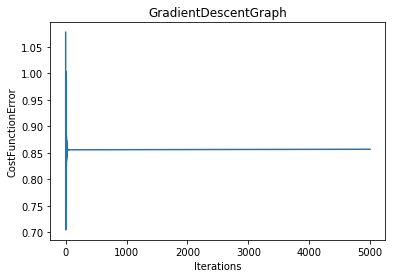

In [37]:
plt.plot(iterations,CE)
plt.xlabel('Iterations')
plt.ylabel('CostFunctionError')
plt.title('GradientDescentGraph')
plt.show()

# Testing area

In [45]:
TestCost = sigmoid(Theta1,Theta2,TestData)

In [59]:
# Checking how many of our predictions are correct with the actual labels
answers = []
correct = 0
for i in range(0,len(TestLabels)):
    if TestCost[i]<0.5:
        answers.append(False)
    else:
        answers.append(True)
for i in range(0,len(TestLabels)):
    if answers[i] == TestLabels.iloc[i]:
        correct = correct+1
Accuracy = correct/len(TestLabels)*100

In [60]:
print("The Accuracy of the model is",Accuracy,"%")

The Accuracy of the model is 67.88951230038843 %
